In [ ]:
from docutils.nodes import label

name = "Wang Qin"
date_returned = "3.12.2024"

# Lab 5
**Kinematic equations and trajectories of free fall**<br>
Software 2<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

You toss a ball straight up at $7.3\;\text{m/s}$. It leaves your hand at $1.5\;\text{m}$ above a floor (See example at page 7 in Software 1, Orientation Physics lecture notes).

The position of the ball can be modeled with equation $y(t) = y_0 + v_0 t - \frac{1}{2}g t^2$, where

- $y_0$ is the initial position
- $v_0$ is the initial velocity
- $g$ is the acceleration due to gravity (9.81 m/s)
- $t$ is the time.

Draw the graph of the position of the ball over time. Use time step of 0.01 s. Limit the range of t to show only positive values of the position (e.g. when $y(t) \geq 0$).

When does the ball hit the ground? Store the value to variable `t_end` with accuracy of 0.01 s.

What is the highest point of the ball? Store the value to variable `y_max` with two decimals accuracy (in units of meters).

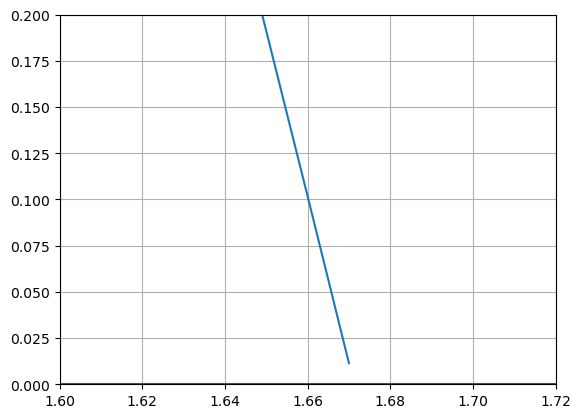

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 1.68, 0.01)
v0 = 7.3
g = 9.81
y0 = 1.5
y = y0 + v0 * t - 0.5 * g * t**2
plt.plot(t, y)
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.xlim(1.6, 1.72)
plt.ylim(0, 0.2)
plt.grid()
t_end = 1.67
y_max = 4.22
plt.show()



In [ ]:
t_end_calc = np.max([t_end, 0])  
print(f't_end = {t_end_calc:.2f} s')

## Problem 2

A raging flood has washed away a section of of highway, creating a gash *2.0 m* deep. A car moving at *31 m/s* goes straight over the edge. How far from the edge of the washout does it land?

<img src="./Lab_5_Problem_2.png" alt="A car moving over the edge" width="500" height="600">

(See Software 1, Orientation Physics lecture notes, page 13).

Sketch a graph of the projectile motion (in x-y coordinates) of the car. The projectile motion can be modeled with equations:

$x = x_0 + v_0 \cdot \cos(\theta) \cdot t$<br>

$y = y_0 + v_0 \cdot \sin(\theta) \cdot t - \frac{1}{2}g\cdot t^2$

where

- $x_0, y_0$ is the initial position
- $\theta$ is the angle between x-axis and the initial velocity
- $g$ is the gravitational acceleration ($9.81 \; m/s^2$)
- $t$ is the time

Find the landing position with *0.1 m* accuracy and store the value to variable `x_landing`.

How long is the time of flight? Find the value for that with *10 ms* (= *0.01 s*) accuracy and store it to the variable `t_flight`.

Use the given range of times for calculations. Do not change them.

Limit the x- and y-axis to show the whole trajectory of the motion from the beginning to the landing position.



Decorate the graphics (grid-line, x- and y-axis labels, title).

Assume the starting position ($x_0, y_0$) of the car's flight is (0, 0) in meters.

NOTE: The angle for trigonometric functions (sin, cos, tan) should be given in [radians](https://en.wikipedia.org/wiki/Radian). For that reason we need [np.deg2rad()](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html) function to convert the degrees to radians. See also: [Conversions of angles](https://en.wikipedia.org/wiki/Radian#Conversions).

Time of flight: 0.64 s


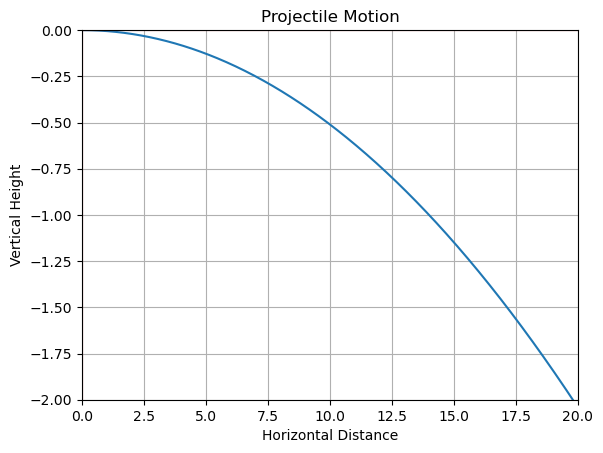

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
y0 = 0
v0 = 31
theta = np.deg2rad(0)
g = 9.81
t = np.arange(0, 1, 0.001)
x = x0 + v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

plt.plot(x, y)
plt.xlim(0, 20)
plt.ylim(-2, 0)
plt.axhline(0, color='red')
plt.axvline(0, color='red')
plt.title('Projectile Motion')
plt.xlabel('Horizontal Distance')
plt.ylabel('Vertical Height')

x_landing = 19.8
i = (y >= -2)
t_flight = round(np.max(t[i]), 2)
print(f'Time of flight: {t_flight} s')

plt.grid(True)
plt.show()

## Problem 3

You are aiming to throw a ball to a target standing on the level (see the graph generated by the code). You stand below the level. The ball leaves your hand 1.3 m above the ground. Find the minimum angle ($\theta$) and speed ($v_0$) to hit the target.

(See also Software 1, Orientation Physics lecture notes, page 14).

Sketch a graph of the projectile motion with time step of 1 ms. Stop counting when it hits the target, e.g. you should end the trajectory data (x, y) to the edge or inside the target area.

Avoid to hit the corner of the level. Leave minimum *2 cm* clearance to the edge.

Use the same projectile motion equations as in the previous problem.

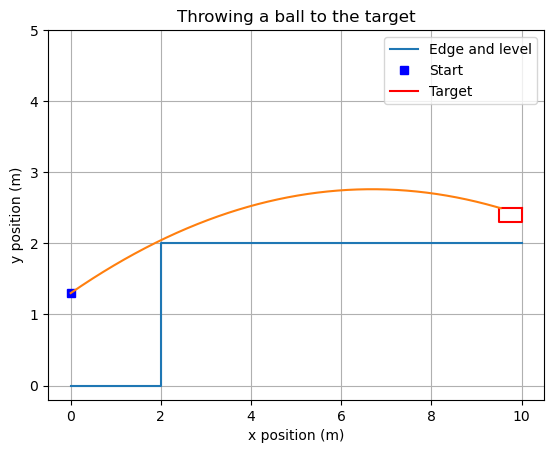

In [4]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0, 0.78, 0.001)

### DO NOT CHANGE THESE SETTINGS !!! ####
x0, y0 = 0, 1.3
x1 = [10, 9.5, 9.5, 10, 10]
y1 = [2.5, 2.5, 2.3, 2.3, 2.5]
x_edge = [0, 2, 2, 10]
y_edge = [0, 0, 2, 2]

x_target = 10
y_target = 2.4
tan_theta = (2-1.3)/1.6
theta = np.arctan(tan_theta)
g = 9.81
v0 = round(np.sqrt((g*np.square(x_target-x0))/(np.square(np.cos(theta)) * (-2) * (y_target-y0-np.tan(theta)*(x_target -x0)))),2)
x = x0 +v0*t*np.cos(theta)
y = y0 + v0*t*np.sin(theta) -0.5*g*t**2
i = (x <= 10) & (y <= 2.5)
t_end = round(np.max(t[i]),3)


plt.plot(x_edge, y_edge, label = 'Edge and level')
plt.plot(x0, y0, 'bs', label = 'Start')
plt.plot(x1, y1, 'r-', label = 'Target')
plt.grid()
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Throwing a ball to the target')
plt.legend()
plt.ylim(-0.2, 5)

# Show the trajectory
plt.plot(x, y)
plt.show()


---
## Bonus

Below is the same code as in previous problem, but the time step is now changed down to 0.01 s in order to create and show the animation faster. You can play with this code and see how the animation works.

Copy your trajectory motion code from previous problem to the code cell below.

In [10]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, 1.3
x_target = 10
y_target = 2.4
tan_theta = (2 - 1.3) / 1.6
theta = np.arctan(tan_theta)
g = 9.81
t = np.linspace(0, 2, 100)
v0 = round(np.sqrt((g * np.square(x_target - x0)) / (np.square(np.cos(theta)) * (-2) * (y_target - y0 - np.tan(theta) * (x_target - x0))), 2))
x = x0 + v0 * t * np.cos(theta)
y = y0 + v0 * t * np.sin(theta) - 0.5 * g * t**2
i = (x <= 10) & (y <= 2.5)
t_end = round(np.max(t[i]), 3)

x1 = [10, 9.5, 9.5, 10, 10]
y1 = [2.5, 2.5, 2.3, 2.3, 2.5]
x_edge = [0, 2, 2, 10]
y_edge = [0, 0, 2, 2]

fig, ax = plt.subplots()
plt.sca(ax)
plt.plot(x_edge, y_edge, label='Edge')
plt.plot(x0, y0, 'bs', label='Start')
plt.plot(x1, y1, 'r-', label='Target')
plt.grid()
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Throwing a ball to the target')
plt.legend()
plt.ylim(-0.2, 5)

l, = ax.plot(x[0], y[0], 'b-')
l2, = ax.plot(x[0], y[0], 'ro')
ax.set_title(f't = {t[-1]:.2f}')
plt.grid(True)

def animate(i):
    i0 = max(0, i - 10)
    l.set_data(x[i0:i], y[i0:i])
    l2.set_data(x[i], y[i])
    ax.set_title(f't = {t[i]:.2f}')

x = np.array(x)
y = np.array(y)

ani = FuncAnimation(fig, animate, frames=len(t))

# Display the animation
plt.show()

TypeError: return arrays must be of ArrayType